In [8]:
using Distributions
using HypothesisTests
using KernelDensity
using LinearAlgebra
using MLBase
using Plots
using PyCall
using RDatasets
using Statistics
using StatsBase
using StatsPlots

┌ Info: Precompiling StatsPlots [f3b207a7-027a-5e70-b257-86293d7955fd]
└ @ Base loading.jl:1278


In [11]:
data = dataset("datasets", "faithful")
@show names(data)
first(data, 6)

names(data) = ["Eruptions", "Waiting"]


,Eruptions,Waiting
,Float64,Int64
1,3.6,79
2,1.8,54
3,3.333,74
4,2.283,62
5,4.533,85
6,2.883,55


In [12]:
describe(data)

,variable,mean,min,median,max,nmissing,eltype
,Symbol,Float64,Real,Float64,Real,Int64,DataType
1,Eruptions,3.48778,1.6,4.0,5.1,0,Float64
2,Waiting,70.8971,43,76.0,96,0,Int64


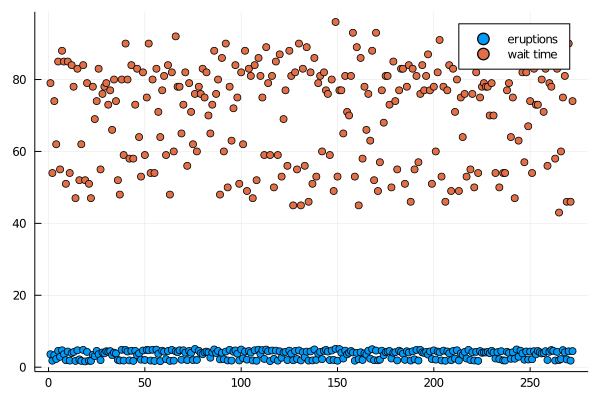

In [14]:
eruptions = data[!, :Eruptions]
scatter(eruptions, label="eruptions")
waittime = data[!, :Waiting]
scatter!(waittime, label="wait time")

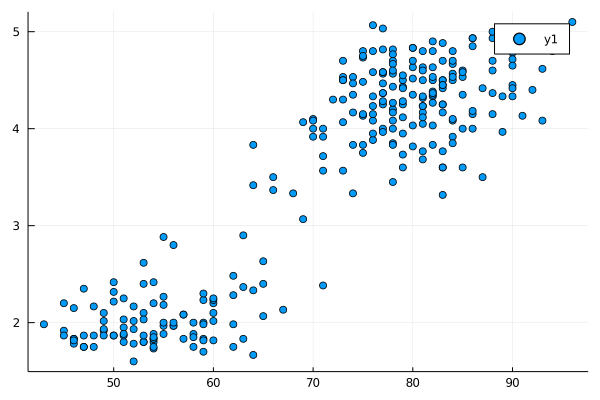

In [15]:
scatter(waittime, eruptions)

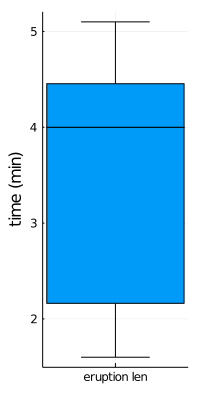

In [18]:
boxplot(["eruption len"], 
        eruptions, 
        legend=false, 
        size=(200, 400), 
        whisker_width=0.4, 
        ylabel="time (min)")

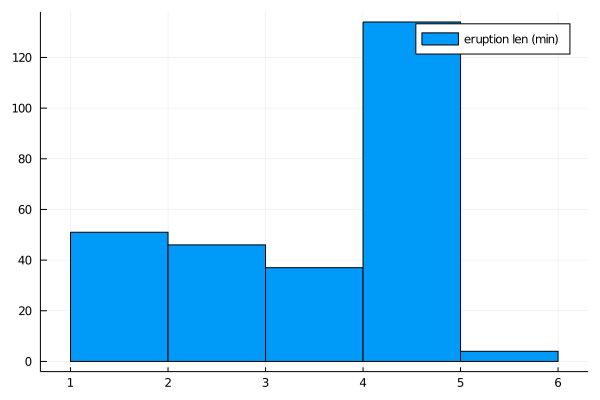

In [19]:
histogram(eruptions, label="eruption len (min)")

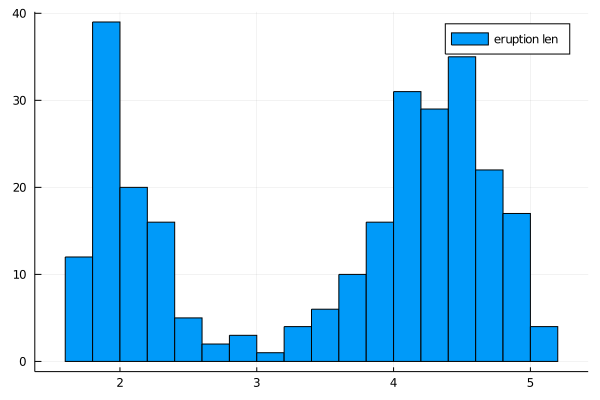

In [20]:
histogram(eruptions, bins=:sqrt, label="eruption len")

In [21]:
?histogram

search: histogram Histogram histogram! histogram2d histogram2d! ea_histogram



```
histogram(x)
histogram!(x)
```

Plot a histogram.

# Arguments

  * `x`: AbstractVector of values to be binned
  * `bins`: Integer, NTuple{2,Integer}, AbstractVector or          Symbol. Default is :auto (the Freedman-Diaconis rule). For          histogram-types, defines the approximate number of bins to aim for,          or the auto-binning algorithm to use (:sturges,          :sqrt, :rice, :scott or :fd). For fine-grained control          pass a Vector of break values, e.g. `range(minimum(x),          stop = maximum(x), length = 25)`
  * `weights`: Vector of weights for the values in `x`, for weighted bin counts
  * `normalize`: Bool or Symbol. Histogram normalization mode.               Possible values are: false/:none (no normalization,               default), true/:pdf (normalize to a discrete               Probability Density Function, where the total area of the               bins is 1), :probability (bin heights sum to 1)               and :density (the area of each bin, rather than               the height, is equal to the counts - useful for               uneven bin sizes).
  * `bar_position`: Symbol.  Choose from `:overlay` (default),                  `:stack`.  (warning: May not be implemented fully)
  * `bar_width`: nothing or Number. Width of bars in data               coordinates. When nothing, chooses based on x (or y when               `orientation = :h`).
  * `bar_edges`: Bool.  Align bars to edges (true), or centers               (the default)?
  * `orientation`: Symbol.  Horizontal or vertical orientation                 for bar types.  Values `:h`, `:hor`,                 `:horizontal` correspond to horizontal (sideways,                 anchored to y-axis), and `:v`, `:vert`, and                 `:vertical` correspond to vertical (the default).

# Example

```julia-repl
julia> histogram([1,2,1,1,4,3,8],bins=0:8)
julia> histogram([1,2,1,1,4,3,8],bins=0:8,weights=weights([4,7,3,9,12,2,6]))
```


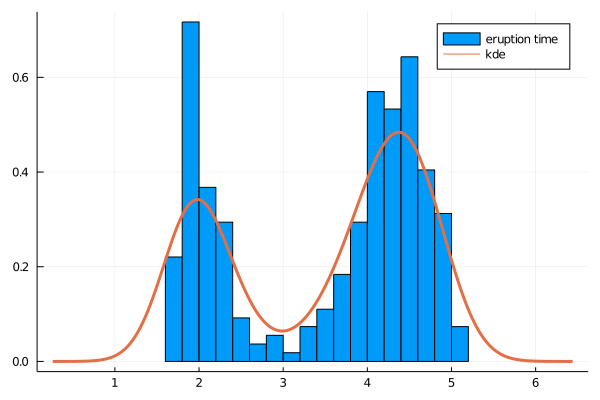

In [27]:
p = kde(eruptions)
histogram(eruptions, bins=:sqrt, normalize=true, label="eruption time")
plot!(p.x, p.density, linewidth=3, color=2, label="kde")

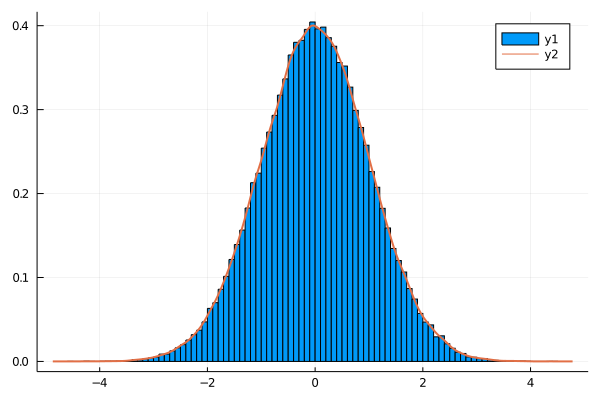

In [28]:
rv = randn(100000)
histogram(rv, normalize=true)
d = kde(rv)
plot!(d.x, d.density, linewidth=2, color=2)

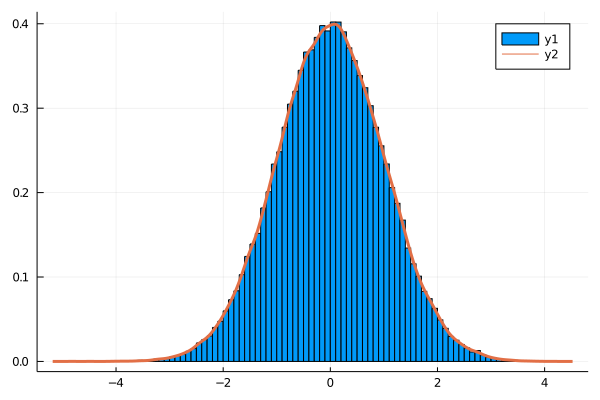

In [34]:
d = Normal()
rv = rand(d, 100000)
histogram(rv, normalize=true)
d = kde(rv)
plot!(d.x, d.density, linewidth=3)

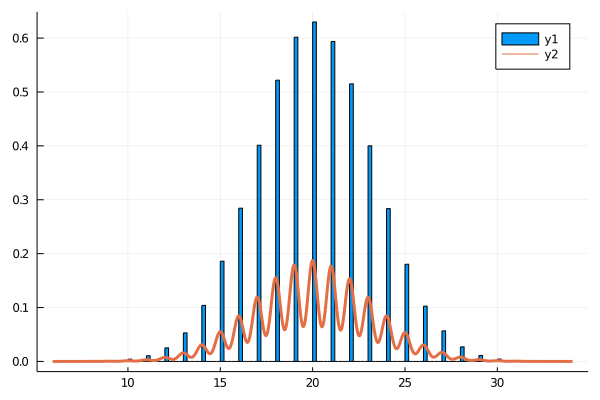

In [35]:
b = Binomial(40)
rv = rand(b, 100000)
histogram(rv, normalize=true)
d = kde(rv)
plot!(d.x, d.density, linewidth=3)

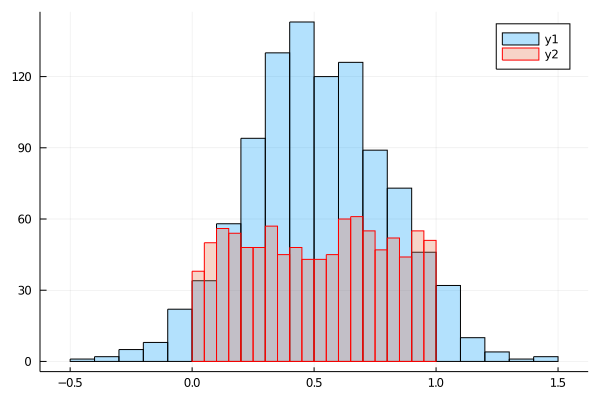

In [36]:
x = rand(1000)
d = fit(Normal, x)
rv = rand(d, 1000)
histogram(rv, nbins=20, fillalpha=0.3)
histogram!(x, nbins=20, linecolor=:red, fillalpha=0.3)

In [37]:
rv = randn(1000)
histogram(rv)
OneSampleTTest(rv) # mean = 0?

One sample t-test
-----------------
Population details:
    parameter of interest:   Mean
    value under h_0:         0
    point estimate:          -0.00186989
    95% confidence interval: (-0.0638, 0.0601)

Test summary:
    outcome with 95% confidence: fail to reject h_0
    two-sided p-value:           0.9528

Details:
    number of observations:   1000
    t-statistic:              -0.059206457685068915
    degrees of freedom:       999
    empirical standard error: 0.03158256588515084


In [38]:
OneSampleTTest(eruptions)

One sample t-test
-----------------
Population details:
    parameter of interest:   Mean
    value under h_0:         0
    point estimate:          3.48778
    95% confidence interval: (3.3515, 3.624)

Test summary:
    outcome with 95% confidence: reject h_0
    two-sided p-value:           <1e-99

Details:
    number of observations:   272
    t-statistic:              50.39726752574924
    degrees of freedom:       271
    empirical standard error: 0.06920579744632577


In [41]:
scipystats = pyimport("scipy.stats")
scipystats.spearmanr(eruptions, waittime) # r, p

(0.7779720576516121, 1.989541990656138e-56)

In [42]:
scipystats.pearsonr(eruptions, waittime)

(0.900811168321813, 8.129958506616769e-100)

In [43]:
corspearman(eruptions, waittime)

0.7779720576516121

In [44]:
cor(eruptions, waittime)

0.900811168321813

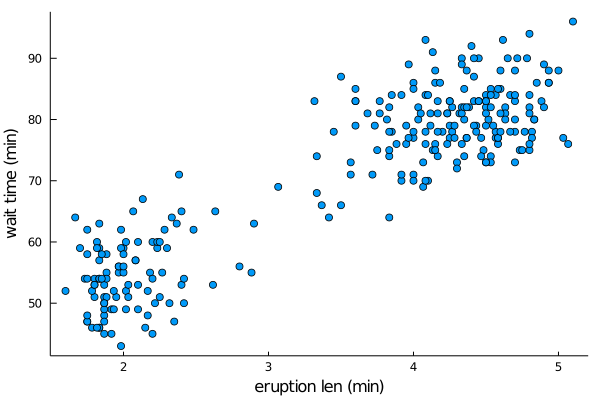

In [46]:
scatter(eruptions, 
        waittime, 
        xlabel="eruption len (min)", 
        ylabel="wait time (min)", 
        legend=false, 
        grid=false)

In [47]:
gt   = [1, 1, 1, 1, 1, 1, 1, 2]
pred = [1, 1, 2, 2, 1, 1, 1, 2]
C = confusmat(2, gt, pred)

2×2 Array{Int64,2}:
 5  2
 0  1

In [48]:
C ./ sum(C, dims=2) # normalize by class

2×2 Array{Float64,2}:
 0.714286  0.285714
 0.0       1.0

In [49]:
sum(diag(C)) / length(gt) # Accuray

0.75

In [50]:
correctrate(gt, pred)

0.75

In [52]:
gt   = [1, 1, 1, 1, 1, 1, 1, 0]
pred = [1, 1, 0, 0, 1, 1, 1, 1]
ROC = roc(gt, pred)

ROCNums{Int64}
  p = 7
  n = 1
  tp = 5
  tn = 0
  fp = 1
  fn = 2


In [56]:
recall(ROC), precision(ROC)

(0.7142857142857143, 0.8333333333333334)